## CSCN8010 - Lab9
## Lifei Wang 8855277    

## Question 1

1. Using Keras Datasets, obtain the fMNIST data set. 

    Explore and describe it as you would do with any new dataset that you start working with (2 points). 

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [4]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Data Exploration

Reference: https://keras.io/api/datasets/fashion_mnist/

Fmnist dataset is consisted of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

Label 0-9:
* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle Boot

In [52]:
# add classnames for the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# data exploration
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


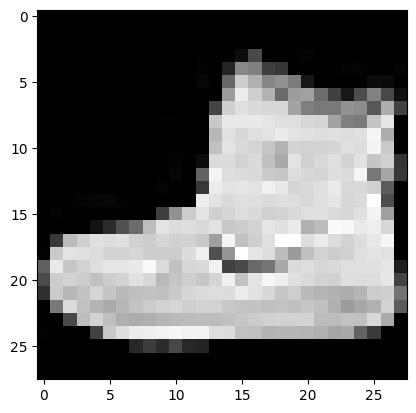

In [6]:
# plot the first image in the training set in grayscale
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')

In [7]:
# print the label of the first image in the training set   
print(f'Label: {train_labels[0]}')

Label: 9


According to the label, it is labeled with 9 which is Ankle Boot category.

## Question 2

2. Train a dense neural network using Keras (2 points)

### Data preprocessing

In [8]:
train_images = train_images.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

In [9]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


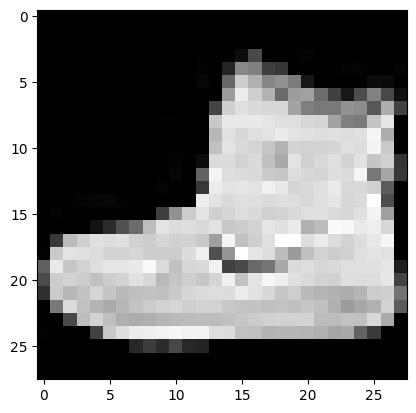

In [10]:
plt.imshow(train_images[0].reshape(28,28), cmap='gray')

### Build the model

In [11]:
model = keras.Sequential([
    # 128 nodes with the first neuron layer with relu activation function
    Dense(128, activation='relu'),

    # 10 nodes with the second neuron layer with softmax activation function
    Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### Train the model

In [13]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5815 - accuracy: 0.7982
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4146 - accuracy: 0.8519
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3679 - accuracy: 0.8657
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3392 - accuracy: 0.8752
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3180 - accuracy: 0.8839
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3026 - accuracy: 0.8892
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2894 - accuracy: 0.8935
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2783 - accuracy: 0.8992
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.9011
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.9045

## Question 3

3. Evaluate its accuracy. Report accuracy, confusion metric

    explore specific examples of incorrect classification
    
    and drew some conclusions from this exploration (2 points)

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 1ms/step - loss: 0.3354 - accuracy: 0.8837
test_acc: 0.8837000131607056


### Make predictions using the model

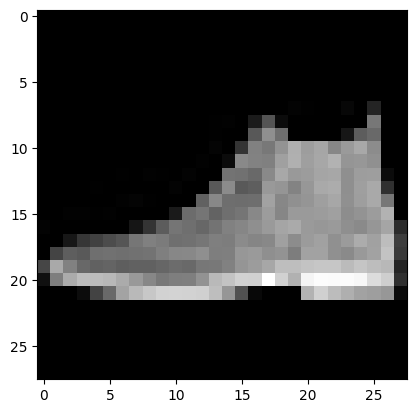

In [15]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')  # the actual image

The first image of test dataset is ankle boot with label 9

In [16]:
prediction = model.predict(test_images[0:1])

1/1 [==============================] - 0s 63ms/step


In [17]:
prediction

array([[2.7737383e-06, 1.1027435e-08, 1.8484877e-07, 2.9725504e-08,
        3.3481288e-06, 2.0329298e-03, 4.7827621e-07, 8.4268466e-02,
        1.5036000e-05, 9.1367674e-01]], dtype=float32)

In [18]:
prediction.argmax()

9

The predicted class with the highest probability is 9, which is ankle boot


In [19]:
test_labels[0]

9

The model made the right prediction of the first image of test set

In [20]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

 45/313 [===>..........................] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


In [21]:
# confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
cm

array([[858,   1,   8,  17,   7,   1,  99,   0,   9,   0],
       [  3, 974,   0,  17,   2,   0,   4,   0,   0,   0],
       [ 24,   1, 728,  12, 163,   0,  72,   0,   0,   0],
       [ 26,  14,   8, 890,  37,   0,  22,   0,   3,   0],
       [  0,   1,  52,  31, 885,   0,  30,   0,   1,   0],
       [  0,   0,   0,   1,   0, 945,   0,  40,   1,  13],
       [122,   0,  63,  30, 105,   0, 667,   0,  13,   0],
       [  0,   0,   0,   0,   0,   9,   0, 976,   0,  15],
       [  7,   0,   1,   4,   7,   1,   5,   4, 971,   0],
       [  0,   0,   0,   0,   0,   7,   1,  49,   0, 943]], dtype=int64)

In [22]:
# accuracy metrics
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8837
Test accuracy: 0.8837000131607056


### Inspect misclassfied examples

In [32]:
# get index of misclassfied predictions
# if the prediction is wrong, then the predicted label does not match the test label
misclassfied_index = np.where(predicted_labels != test_labels)[0]
misclassfied_index

array([  12,   17,   23, ..., 9979, 9985, 9989], dtype=int64)

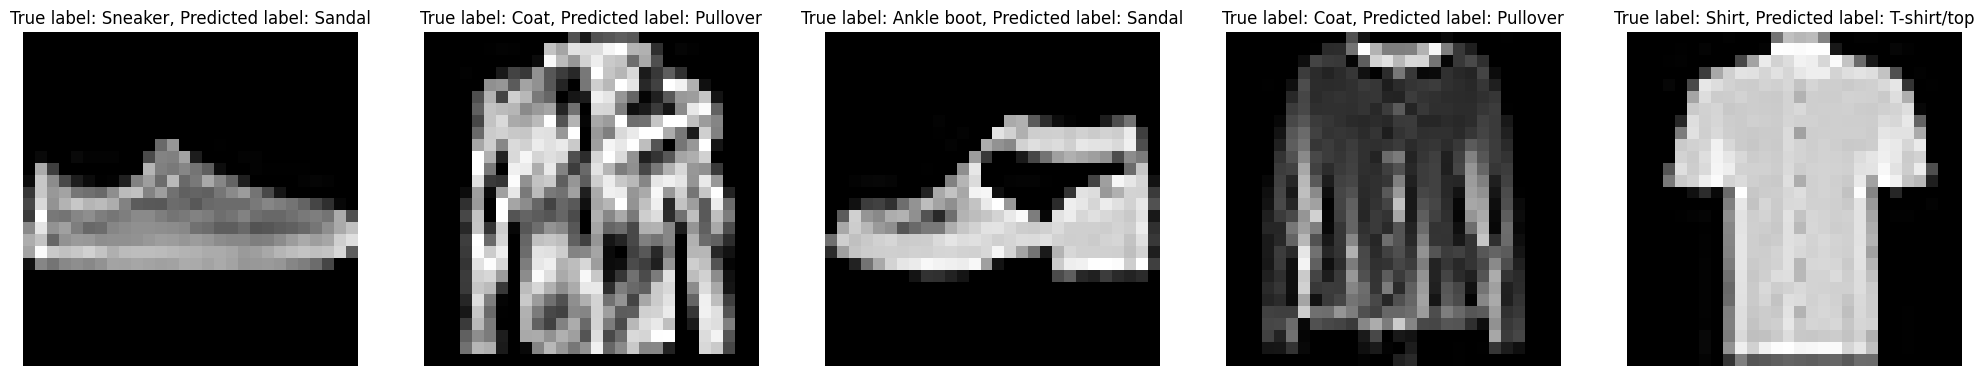

In [58]:
# adjust plot size
plt.figure(figsize=(25, 8))

# plot the first 5 misclassified examples
for i, index in enumerate(misclassfied_index[:5]):
    # plot the misclassified predictions in one figure
    plt.subplot(1, 5, i+1)

    # reshape the images to original size
    misclassfied_image = test_images[index].reshape(28,28)
    
    # plot the true images
    plt.imshow(misclassfied_image, cmap='gray')

    # add the true labels and misclassfied labels
    true_label = class_names[test_labels[index]]
    misclassfied_label = class_names[predicted_labels[index]]
    plt.title(f'True label: {true_label}, Predicted label: {misclassfied_label}')
    
    # remove the axis labels
    plt.axis('off')
plt.show()